# Lineare Algebra

## Matrix- und Vektor-Produkte

```python
numpy.dot(array1, array2)
array1.dot(array2)
```

Für 1d-Arrays berechnet `dot` das Skalarprodukt:

In [1]:
from numpy import arange

v = arange(3)
v.dot(v)

5

Für 2d-Arrays berechnet `dot` das Matrix-Produkt:

In [1]:
from numpy import arange
A = arange(9).reshape((3, 3))
A.dot(A)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

Für 1d- und 2d-Arrays berechnet `dot` das Matrix-Vektor-Produkt:

In [1]:
A.dot(v)

array([ 5, 14, 23])

In [1]:
v.dot(A)

array([15, 18, 21])

Höher-dimensionale Arrays werden als *Array von Matrizen* aufgefasst, wobei jeweils die letzten beiden Achsen die Matrix definieren, d.h. beispielsweise für 3d-Arrays
```python
dot(a, b)[i,j,k,l] == sum(a[i,j,:] * b[k,:,l])
```

```python
(a @ b)[i,j,l] == sum(a[i,j,:] * b[k,:,l])
```

wenn i == k oder i == 1 oder k == 1

In [1]:
from numpy import arange
a = arange(24).reshape((2,3,4))
b = arange(40).reshape((2,4,5))
a @ b
(a @ b).shape

(2, 3, 5)

### `@`-Operator

Ab Python 3.5 gibt es speziell für `dot` auch den `@` Operator:

In [1]:
v @ v

5

In [1]:
A @ v

array([ 5, 14, 23])

In [1]:
A @ A

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

## Determinante
```python
numpy.linalg.det(array)
```
berechnet die Determinante einer Matrix; `array` muss mindestens zwei-dimensional sein. Höher-dimensionale Arrays werden wie oben als *Array von Matrizen* aufgefasst.

In [1]:
from numpy.linalg import det
det(A)

0.0

## Eigenwerte und Eigenvektoren

Gilt folgende Gleichung für eine quadratische Matrix $A$ und $x$ ein Spaltenvektor  

$$A x = \lambda x$$

dann sind $\lambda$ die Eigenwerte der Matrix.

```python
numpy.linalg.eig(array)
```
berechnet die Eigenwerte und Eigenvektoren einer Matrix; der Rückgabewert ist ein Tupel aus einem 1d-Array von Eigenwerten und einem 2d-Array von Eigenvektoren, so dass wenn
```python
b, W = eig(A)
```
dann
```python
A @ W == W @ diag(b)
```
bis auf numerische Fehler. D.h. die *Spalten* von `W` sind die Eigenvektoren:
```python
A @ W[:,i] == b[i] * W[:,i]
```
für alle `i`. Die Eigenvektoren sind auf 1 normiert.

`eig` funktioniert analog auch mit höher-dimensionalen Arrays als *Arrays von Matrizen*.

In [1]:
from numpy.linalg import eig
b, W = eig(matrix)
b, W

(array([  1.33484692e+01,  -1.34846923e+00,  -1.15433316e-15]),
 array([[ 0.16476382,  0.79969966,  0.40824829],
        [ 0.50577448,  0.10420579, -0.81649658],
        [ 0.84678513, -0.59128809,  0.40824829]]))

In [1]:
from numpy import diag
A @ W - W @ diag(b)

array([[ -4.44089210e-16,   0.00000000e+00,  -3.05901578e-16],
       [ -8.88178420e-16,  -1.38777878e-16,  -1.66415404e-15],
       [ -3.55271368e-15,   1.66533454e-15,   4.71254539e-16]])

## Invertieren von Matrizen

Mathematisch wird die lineare Gleichung

$$A x =y$$

für $A \in \mathbb{C}^{n\times n}$ und $y \in \mathbb{C}^n$ gelöst durch

$$y = A^{-1} x,$$

jedenfall solange $A$ *invertierbar* ist. Inverse Matrizen können berechnet werden über

```python
scipy.linalg.inv(A)
```

In [1]:
from scipy.linalg import inv
from numpy import diag, ones

# Beispiel-Matrix
A = diag(ones(3)) - diag(ones(2), 1)
print('A = \n', A, '\n')

# Inverse
iA = inv(A)
print('A^{-1} = \n', iA, '\n')

print('A^{-1} * A = \n', iA @ A, '\n')
print('A * A^{-1} = \n', A @ iA, '\n')

A = 
 [[ 1. -1.  0.]
 [ 0.  1. -1.]
 [ 0.  0.  1.]] 

A^{-1} = 
 [[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]] 

A^{-1} * A = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

A * A^{-1} = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 



### Achtung

Die Berechnung einer inversen Matrix ist eine recht aufwändige Operation.
Ausserdem sind Lösungen mittels der Inversen oft numerisch instabiler als
alternative Methoden.

Zum Lösen von Gleichungen sollte die Inverse daher nicht explizit berechnet
werden.

## Lösen linearer Gleichungen

### Einzelne Gleichungen: `solve`

Das lineare Gleichungssystem $A x = y$ wird gelöst durch

``` python
scipy.linalg.solve(A, y)
```

#### Beispiel

In [1]:
from scipy.linalg import solve
from numpy import ones, diag

# Beispiel-Matrix und -Vektor
A = diag(ones(10)) - diag(ones(9), 1)
x = ones(10)

# Anwenden
y = A @ x

# Lösen; sollte `== x` sein
solve(A, y)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

### Normen

Normen berechnen die "Länge" von Vektoren. Die wichtigsten Normen sind die sog.
$p$-Normen.

- Für $p \geq 1$:

    $$\|x\|_p := \left( \sum_{i=1}^n  |x_i|^p \right)^{1/p}$$

- Für $p=\infty$

    $$\|x\|_\infty = \max_{i=1, \dots, n} |x_i|.$$

$p = 2$ ist die "normale" euklidische Norm. In Python werden Normen berechnet mit
```python
scipy.linalg.norm(x, ord)
```
Default ist `ord = 2`.

Vektor-Normen zugeordnet sind Matrix-Normen, die die maximale Verlängerung eines
Vektors messen:

$$\|A\|_p = \sup_x \frac{\|A x\|_p}{\|x\|_p}$$

Spezialfälle:

- $p = 1$: Spaltensummennorm

    $$\|A\|_1 = \max_j \sum_i |a_{ij}|$$

- $p = 2$: Spektralnorm ($\lambda_{\text{max}}$: größter Eigenwert):

    $$\|A\|_2 = \sqrt{\lambda_{\text{max}} (A^T \cdot A)}$$

- $p = \infty$: Zeilensummennorm:

    $$\|A\|_\infty = \max_i \sum_j |a_{ij}|$$

- Oft ist auch die Frobenius-Norm

    $$\|A\|_F = \sqrt{\sum_{ij} |a_{ij}|^2}$$

    nützlich.

In Python:
```python
scipy.linalg.norm(A, ord)
```
Default ist `ord = 'fro'`. Für Matrizen kann `ord` nur `1`, `2`, `inf` oder
`'fro'` sein.

### Kondition einer Matrix

Zu lösen ist die Gleichung $A x = y$ mit einer invertierbaren Matrix $A$, es
soll also $x = A^{-1} y$ berechnet werden, allerdings ist nur eine Approximation
$\tilde y$ von $y$ mit Fehler

$$\delta_y = y - \tilde y$$

bekannt.

Die **Kondition** von $A$ ist eine obere Schranke an die Verstärkung des Fehlers

$$\delta_x = A^{-1} y - A^{-1} \tilde y$$

in Relation zum Fehler $\delta_y$ der rechten Seite, wobei beide Fehler relativ
und in der $p$-Norm gemessen werden:

$$\text{cond}(A) := \sup
\left( \frac{\|\delta_x\|_p}{\|x\|_p}
\middle/ \frac{\|\delta_y\|_p}{\|y\|_p} \right)$$

Man kann zeigen, dass

$$\text{cond}(A) = \|A\|_p \| A^{-1}\|_p.$$

In Python:
``` python
numpy.linalg.cond(A, p)
```

Default ist `p = 2`, also die Kondition bezüglich der Spektralnorm. Andere
Möglichkeiten sind wieder `1`, `inf` und `'fro'`.

#### Beispiel

Eine *Hilbert-Matrix* ist eine Matrix der Form

$$
\begin{pmatrix}
1       & \frac12 & \frac13 & \dots \\
\frac12 & \frac13 & \frac14 & \dots \\
\vdots  & \vdots  & \vdots  & \ddots
\end{pmatrix}
$$

Hilbert-Matrizen sind extrem schlecht konditioniert:

In [1]:
from scipy.linalg import hilbert
from numpy.linalg import cond, norm

H = hilbert(20)
cond(H)

1.3553657908688225e+18

In [1]:
from scipy.linalg import solve
from numpy import ones

x = ones(20)
y = H @ x

y_approx = y.copy()
y_approx[0] = y_approx[0] + 1e-5
print('error in y = ', norm(y_approx - y) / norm(y))

x_approx = solve(H, y_approx)
print('error in x = ', norm(x_approx - x) / norm(x))

error in y =  1.4502495531331887e-06
error in x =  46651.21704525998


/nix/store/cwf94438msy49dqkvr5n79apj8f9lplk-python3-3.6.6-env/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.932835382563588e-20 / 1.1102230246251565e-16
  RuntimeWarning)


In [1]:
solve(H,y_approx)

/nix/store/cwf94438msy49dqkvr5n79apj8f9lplk-python3-3.6.6-env/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.932835382563588e-20 / 1.1102230246251565e-16
  RuntimeWarning)


array([ 1.00083710e+00,  1.01026595e+00, -1.83197010e+00,  7.80546086e+01,
       -9.31347225e+02,  6.28173344e+03, -2.56012373e+04,  6.41805999e+04,
       -9.25182537e+04,  5.08246885e+04,  5.26003230e+04, -9.52923099e+04,
        1.51286157e+04,  7.06988137e+04, -6.87982722e+04,  4.36279685e+04,
       -4.53928454e+04,  3.89971831e+04, -1.64300112e+04,  2.56611658e+03])

## Rundungsfehler

Die Kondition beschreibt die Fehleranfälligkeit des zu lösenden *Problems*. Zusätzlich können Fehler auftreten dadurch, dass Lösungs-Verfahren oft nicht exakt implementiert werden können, d.h. auch die numerische *Approximation* des zu lösenden Problems kann zu Fehlern führen, z.B. aufgrund von Rundungsfehlern.

Die beiden Effekte sind nicht unabhängig voneinander: aufgrund von Rundungsfehlern hat man z.B. (fast) nie exakt richtige rechte Seiten einer linearen Gleichung, so dass schlecht konditionierte Probleme auch oft numerisch fehleranfälliger sind.

#### Beispiel

Was ist

$$\frac{(x+1) - 1}{x}$$

für kleine $x$?

In [1]:
x = 1e-15
((x+1) - 1) / x

1.1102230246251565

`1e-15` ist im Computer nicht exakt darstellbar (Binärsystem). Fließkommazahlen haben in Python eine Genauigkeit von 53 Bits, d.h. ca
$$ \log_{10}(2^{53}) \approx 15.95 $$
signifikante Dezimalstellen. Bei `1 + 1e-15` werden also fast alle Binärstellen von `1e-15` abgeschnitten, was zu dem großen relativen Fehler führt.

Von `x = 1e-16` bleibt tatsächlich nichts mehr übrig:

In [1]:
x = 1e-16
((x+1) - 1) / x

0.0

Tatsächlich ist die Subtraktion zweier fast gleicher Zahlen numerisch instabil. Ausserdem sieht man, dass die numerische Addition nicht assoziativ ist:

In [1]:
x = 1e-15
print( (x+1)-1 )
print( x+(1-1) )

1.1102230246251565e-15
1e-15


### LU-Zerlegung
Bei der LU-Zerlegung wird die Matrix $A$ zerlegt in das Produkt

$$A = P L U,$$

mit

- $P$: eine Permutations-Matrix,
- $L$: eine untere Dreiecksmatrix mit nur Einsen auf der Diagonalen,
- $U$: eine obere Dreiecksmatrix.

Das heißt z.B. $U$ hat die Form

$$U =
\begin{pmatrix} 
*      & *      & \dots  & *      & * \\ 
0      & *      & \dots  & *      & * \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0      & 0      & \dots  & *      & * \\
0      & 0      & \dots  & 0      & *
\end{pmatrix},$$

wobei nur an den $*$-Positionen nicht-verschwindende Einträge stehen. Die Gleichung

$$P L U x = y$$

ist über $P a = y$, $L b = a$, $U x = b$, wesentlich leichter zu lösen als $A x = y$.

Die Berechnung der LU-Zerlegung funktioniert über den

#### Gauß-Algorithmus

Sei $A$ eine $n \times n$-Matrix mit Elementen $(a_{ij})_{i,j=1}^N$. Angenommen,
das obere linke Element $a_{11} \neq 0$ (ansonsten müssten Zeilen vertauscht
werden; daher die Permutations-Matrix $P$ oben). Dann subtrahiert man geeignete
Vielfache der ersten Zeile von allen anderen Zeilen so, dass alle Einträge in
der ersten Spalte bis auf den oben links verschwinden. Konkret ersetzt man alle
Elemente $a_{ij}$ mit $i \geq 2$ durch

$$a'_{ij} = a_{ij} - \frac{a_{i1}}{a_{11}} a_{1j}.$$

Man erhält so eine neue Matrix $A'$ der Form

$$
A' =
\begin{pmatrix}
a_{11} & *      & \dots  & * \\
0      & *      & \dots  & * \\
\vdots & \vdots & \ddots & \vdots \\
0      & *      & \dots  & *
\end{pmatrix}
$$


Durch scharf Hinsehen erkennt man, dass sich die $A$ schreiben lässt als

$$A =
\begin{pmatrix}
1      & 0      & 0      & \dots  & 0 \\
l_{21} & 1      & 0      & \dots  & 0 \\
l_{31} & 0      & 1      & \dots  & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
l_{n1} & 0      & 0      & \dots  & 1
\end{pmatrix}
A'
$$

mit $l_{j1} = \frac{a_{j1}}{a_{11}}$.

Damit hat man nun die erste Spalte von $L$ und die erste Zeile von $U$ gefunden.

Das Verfahren behandelt dann den unteren rechten $(n-1) \times (n-1)$-Block in
der gleichen Weise und verfährt so weiter, bis die gesamte Matrix abgearbeitet
ist.

### LU-Zerlegung mit Scipy

Sollen mehrere Gleichungen für die Matrix $A$ mit unterschiedlichen rechten
Seiten gelöst werden, dann bietet es sich an, die LU-Zerlegung einmal
vorzuberechnen über

```python
LUP = scipy.linalg.lu_factor(A)
```

und dann Gleichungen zu lösen mit

```python
scipy.linalg.lu_solve(LUP, y)
```

`lu_factor` berechnet eine "komprimierte" Version der Zerlegung. Alternativ kann
mit

```python
P, L, U = scipy.linalg.lu(A)
```

die Zerlegung explizit berechnet werden.

In [1]:
from scipy.linalg import lu_factor, lu_solve, hilbert
P, L, U = lu(hilbert(3))
U

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.        ,  0.08333333,  0.08888889],
       [ 0.        ,  0.        , -0.00555556]])

## Anwendung: 1d Randwertproblem

Suche eine Funktion 

$$u: [0,1] \to \mathbb{R},$$ 

so dass 

$$
\begin{gather}
-u''(x) = e^{kx}, \quad x \in (0, 1) \\
u(0) = u(1) = 0
\end{gather}
$$

für ein gegebenes $k \in \mathbb{R}$.

*Problem:* Es kann i.A. keine geschlossene Lösungsdarstellung angegeben werden.

*Ausweg:* Approximation der Lösung. 

### Finite Differenzen

- Diskretisierung: $0 = x_0 < \dots < x_{n-1} = 1$ mit $x_i = \frac{i}{n-1}$

- Differenzenquotient: 

    $$u''(x_i) \approx \frac{u(x_{i-1}) - 2 u(x_i) + u(x_{i+1})}{h^2}, \quad h := \frac{1}{n-1} $$

- Einsetzen in $-u''(x) = e^x$ ergibt

    $$\frac{-u(x_{i-1}) + 2 u(x_i) - u(x_{i+1})}{h^2} = e^{x_i}, \quad i=1, \dots, n-2$$ 

- Randbedingung $\Rightarrow u(x_0) = u(x_{n-1}) = 0$.

$\Rightarrow$ Lineares Gleichungssystem für $u(x_1), \dots ,u(x_{n-2})$.

### Diskretes Problem

Setze $z = (u(x_1), \dots, u(x_{n-2}))^T$, und löse das Gleichungssystem  $D z = f$  mit 

$$ D := \frac{1}{h^2}
\begin{pmatrix}
 2 & -1 &  & &   0 \\
-1 & 2  & -1 &    & \\ 
   & \ddots & \ddots & \ddots   &\\
   & &  -1 & 2  & -1  \\ 
0 &  &    & -1 & 2 \\
\end{pmatrix},
\qquad
f :=
\begin{pmatrix}
e^{k x_1} \\
\vdots \\
e^{k x_{n-2}}
\end{pmatrix}.
$$

In [1]:
from numpy import linspace, diag, ones, empty
from numpy.linalg import solve

def poisson1d(f, n):
    """
    Berechnet mit finiten Differenzen die Lösung u des 1-dimensionalen
    Poisson-Problems

        -u'' = f in (0, 1)
        u(0) = u(1) = 0

    Parameter
    ---------
    f: Funktions-Objekt
        Die rechte Seite
    n: Integer
        Die Anzahl der Stützstellen

    Rückgabe
    --------
    (x, y): Tupel von n-elementigen Arrays
        x: Die Stützstellen
        y: Die approximierte Lösung
    """

    # Stützstellen
    x = linspace(0, 1, n)
    h = x[1] - x[0]

    # rhs hat (n-2) Elemente
    rhs = f(x[1:-1])

    # D ist eine (n-2) x (n-2) Matrix
    D = 1/h**2 * (diag(2 * ones(n-2), 0) - diag(ones(n-3), 1) - diag(ones(n-3), -1))

    y = empty(n)
    y[0] = 0
    y[1:-1] = solve(D, rhs)
    y[-1] = 0

    return x, y

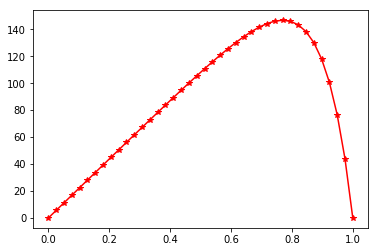

In [1]:
from numpy import exp
from matplotlib.pyplot import plot
%matplotlib inline

x, y = poisson1d(lambda x: exp(10 * x), 40)
plot(x, y, 'r*-')